# 선형 회귀 실습

## 선형회귀
- 입력값에 대해 결과값이 1차함수의 형태로 반응함
- 데이터를 반복적으로 관찰하면 직선의 형태로 회귀함
- 입력데이터(x)와 타겟데이터(y)를 통해 최적의 기울기(a)와 절편(b)을 찾고자 함

## 경사하강법
- 선형회귀의 목적(산점도 그래프를 잘 표현하는 직선의 방정식을 찾는) 달성을 위한 방법 중 하나
- 기울기와 cost사이의 관계에서, 임의의 기울기 w를 설정하고 cost를 최소로 하는 방향으로 값을 수정해나감

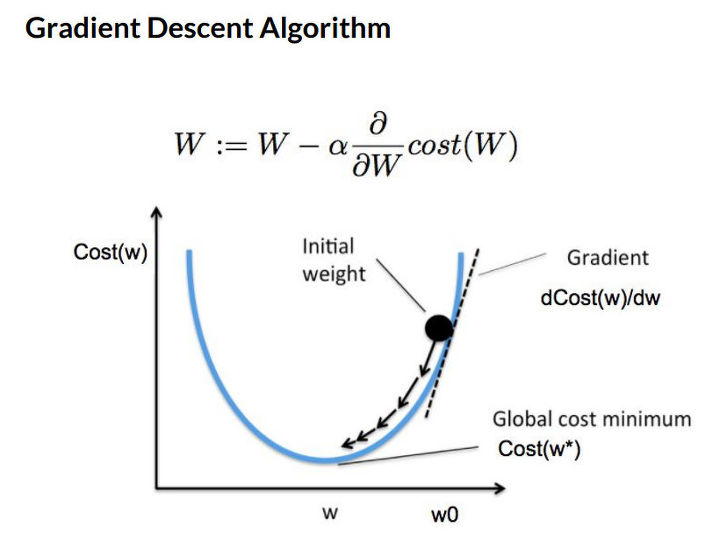

- 즉 **y^ = wx + b** 로 표현되는 우리의 예측값y^을 정답 y와 가깝게 만드는 과정

- 과정은 다음과 같음
    1. 무작위로 w와 b를 설정함 (무작위로 모델 만들기)
    2. x에서 샘플 하나를 선택하여 y^을 계산함 (무작위로 모델 예측하기)
    3. y^과 선택한 샘플의 정답 y를 비교함 (예측한 값과 정답 비교하기)
    4. y^이 y와 더 가까워지도록 w,b를 조정함 (모델 조정하기)
    5. 모든 샘플을 처리할 때까지 2~4를 반복함


## 당뇨병 환자 데이터로 실습

### 1. 데이터 가져오기

In [2]:
#1. load_diabetes() 함수 호출하기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [10]:
#2.입력 데이터 확인하기
import pandas as pd

diabetes_data = diabetes.data
diabetes_label = diabetes.target

diabetes_df = pd.DataFrame(data = diabetes_data, columns = diabetes.feature_names)
diabetes_df['label'] = diabetes.target
diabetes_df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [5]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

In [11]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [3]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


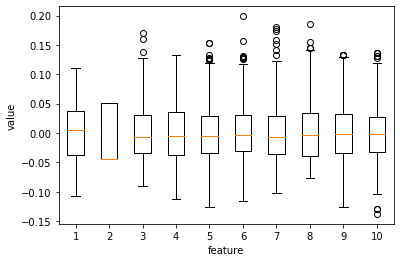

In [13]:
#3.박스플롯으로 특성의 사분위 관찰하기
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(diabetes.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

### 2. 데이터 시각화하기

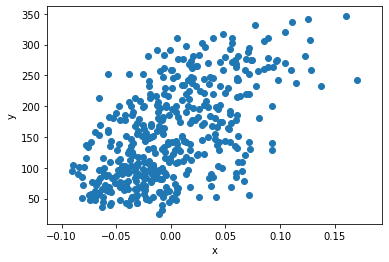

In [14]:
#1.scatter() 함수로 산점도 그리기
#데이터 세트의 10개 특성을 모두 그래프로 표현하려면 3차원 이상의 그래프가 필요하므로, 세 번째 특성과 타깃데이터만 사용함
import matplotlib.pyplot as plt

plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x') #diabetes.data의 세번째 특성
plt.ylabel('y') #diabetes.target
plt.show() #그래프를 통해 특성과 타겟 데이터 사이의 정비례 관계를 유추 가능

In [15]:
#2.훈련데이터 준비하기
x = diabetes.data[:, 2] #데이터의 세 번째 특성을 분리해 저장
y = diabetes.target

### 3. 경사하강법 실습

In [16]:
#1.w,b를 임의의 값으로 초기화
w = 1.0
b = 1.0

In [17]:
#2.샘플 하나를 선택하여 y^을 계산
y_hat = x[0]*w + b
print(y_hat)

1.0616962065186886


In [18]:
#3.진짜y와 예측값 y_hat 비교
print(y[0])

151.0


In [19]:
#4.w값 조정해 예측값 바꾸기, w와 b를 조금씩 변경해서 y_hat의 증감 여부를 살펴봄
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [21]:
#5.과정 4 이후 예측값의 증가 정도를 확인함
#즉 첫번째 훈련 데이터 x[0]에 대한 w의 변화율을 구함
w_rate=(y_hat_inc-y_hat)/(w_inc-w)
print(w_rate)

#여기서 w_rate에 대한 코드를 수식으로 정리하면 변화율은 결국 x[0]
print(x[0])

0.061696206518688734
0.0616962065186885


그 이유는 아래의 수식과 같음

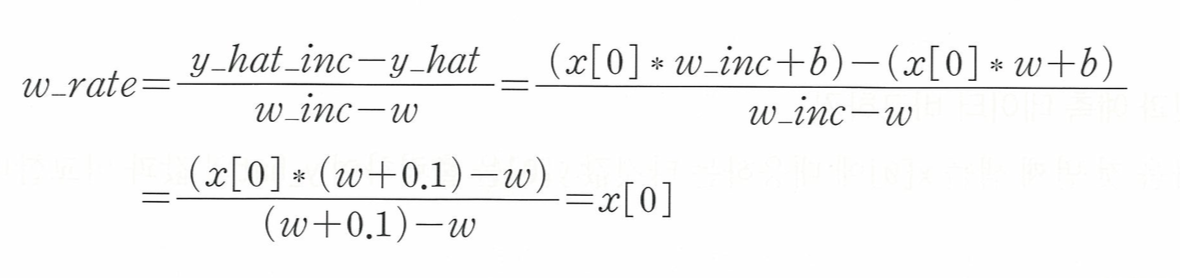

In [22]:
#6.변화율로 가중치 업데이트 하기
w_new = w + w_rate
print(w_new)

1.0616962065186888


- 변화율이 양수일 때 y_hat을 증가시키려면, w를 증가시켜야
- 변화율이 음수일 때 y_hat을 증가시키려면, w를 감소시켜야

In [23]:
#7.변화율로 절편 업데이트 하기
#절편 b에 대한 변화율을 구한 다음 변화율로 b를 업데이트 함(b를 0.1만큼 증가시킴)
b_inc=b+0.1
y_hat_inc=x[0]*w+b_inc
print(y_hat_inc)

b_rate=(y_hat_inc-y_hat)/(b_inc-b)
print(b_rate)

1.1616962065186887
1.0


In [24]:
#b의 변화율이 1이므로 , b가 1만큼 증가하면 y_hat도 1만큼 증가함을 알 수 있음
#b를 업데이트함
b_new=b+1
print(b_new)

2.0


그러나 이 방법으로는
- y_hat이 y에 한참 미치지 못하는 값이 경우 w와 b를 더 큰 폭으로 수정할 수 없고
- y_hat이 y보다 커지면 y_hat을 감소시킬 수 없음
- 위의 이유로, 더 능동적인 업데이트 방법인 **오차역전파**를 이용함

#### 오차역전파로 가중치와 절편 업데이트 하기

- y와 y_hat의 오차를 변화율에 곱하는 방법으로 w를 업데이트 함
- y_hat이 y에 한참 미치지 못하는 경우 w와 b를 큰 폭으로 수정함
- y_hat이 y보다 커지면 w와 b의 방향을 바꿔줌

In [25]:
#8.오차와 변화율을 곱하여 가중치 업데이트 하기
#x[0]일 때 w의 변화율과 b의 변화율에 오차를 곱함
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [26]:
#두 번째 샘플의 오차를 이용하여 새로운 가중치와 절편을 구함
#w_rate = 샘플값이므로, 여기서 w_rate = x[1]
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [27]:
#전체 샘플에 대해 반복함
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err

print(w, b)

587.8654539985689 99.40935564531424


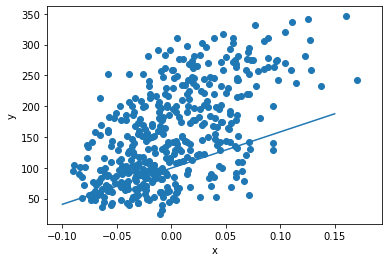

In [28]:
#그래프를 통해 확인
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [29]:
#여러 에포크를 반복함
#100번의 에포크를 반복하면서 직선의 이동을 확인

for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err

print(w, b)

913.5973364345905 123.39414383177204


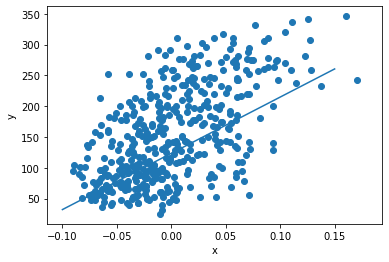

In [30]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**이 데이터의 선형회귀 모델은**
**y^ = 913.6x + 123.4**

- 얻은 모델을 이용해 새로운 데이터에 대한 예측값을 얻을 수 있음
- (x=0.18이 새로운 데이터일 때, 아래 그래프의 주황색 점이 해당 데이터에 대한 y^)

In [31]:
x_new=0.18
y_pred=x_new*w+b
print(y_pred)

287.8416643899983


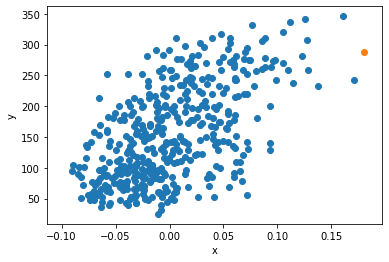

In [32]:
plt.scatter(x,y)
plt.scatter(x_new,y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()